# <h1><center><font color='Blue'><b>Machine Learning Task<font></a>
### <section><center><font color='gray'>(Ezi-technologies)</a>
### <h2><center><font color='orange'>Iris Classification<font></a>


## Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix

## Load Data 

In [2]:
data=pd.read_csv("iris.csv")
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print("Columns Rows")
print("____________")
data.shape

Columns Rows
____________


(150, 5)

## Pre-processing 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
#checking duplicate values
data.duplicated().sum()

3

In [6]:
#drop duplicates except fist
data = data.drop_duplicates(keep='first')

In [7]:
#checking duplicate values
data.duplicated().sum()

0

In [8]:
data['species'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [9]:
encoder = LabelEncoder()
data['species'] = encoder.fit_transform(data.species)
x = data.drop('species',axis=1)
y = data['species']
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


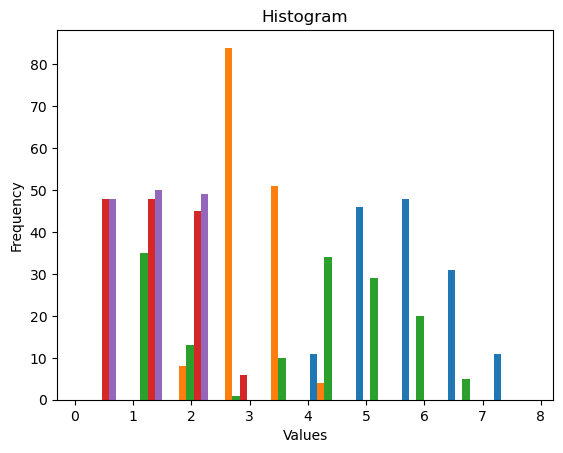

In [10]:
# Plotting a histogram
plt.hist(data, bins=10)
plt.title('Histogram')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

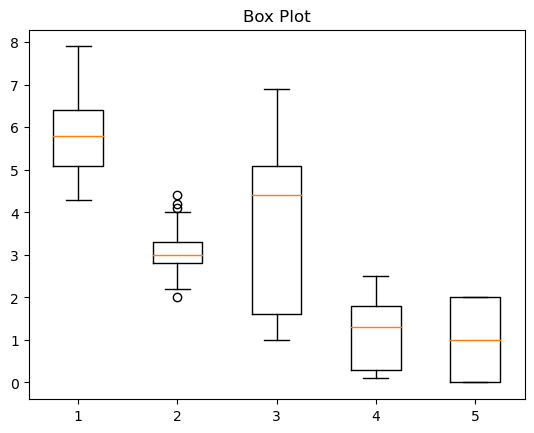

In [11]:
# Plotting a box plot
plt.boxplot(data)
plt.title('Box Plot')
plt.show()

## Spliting Data 

In [12]:
x_train , x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=42)

## Scaling 

In [13]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## Feature Selection 

In [14]:
from sklearn.feature_selection import SelectKBest, chi2

# Apply feature selection using SelectKBest with chi-squared test
k = 2  # Number of features to select
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(x, y)

# Get the selected feature indices
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_feature_names = [data.species[i] for i in selected_feature_indices]

# Print the selected features
print("Selected Features:")
for feature in selected_feature_names:
    print(feature)

Selected Features:
0
0


## Train Different Models

In [15]:
model = LogisticRegression()
model.fit(x_train,y_train)
train_acc = model.score(x_train,y_train)
test_acc = model.score(x_test,y_test)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

print(f'Train Accuracy:{train_acc}')
print(f'Test Accuracy:{test_acc}')
print(f'Accuracy:{accuracy}')

Train Accuracy:0.9803921568627451
Test Accuracy:0.9777777777777777
Accuracy:0.9777777777777777


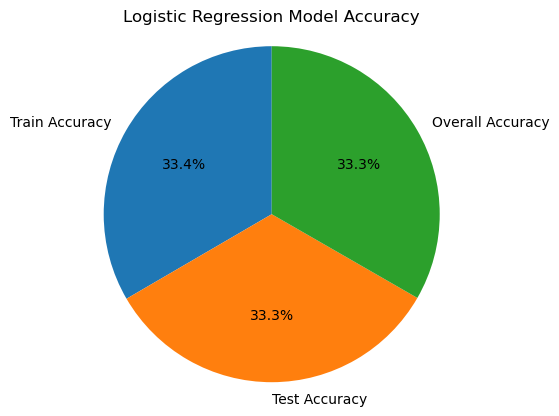

In [16]:
labels = ['Train Accuracy', 'Test Accuracy', 'Overall Accuracy']
accuracy_scores = [train_acc, test_acc, accuracy]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.pie(accuracy_scores, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular
plt.title('Logistic Regression Model Accuracy')
plt.show()

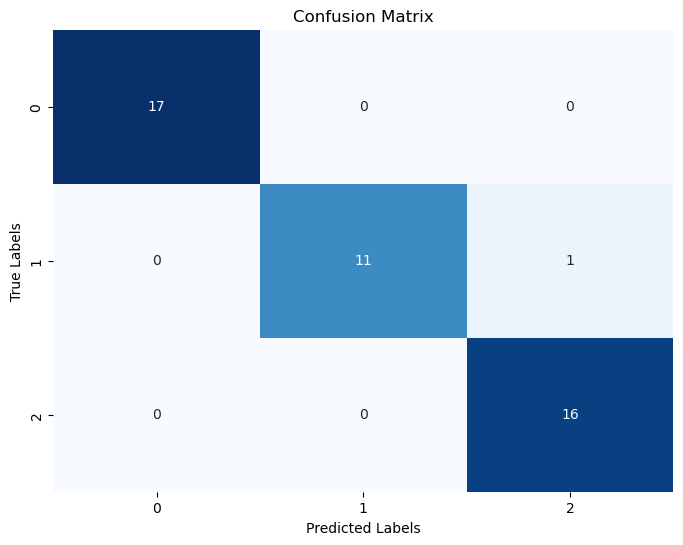

In [17]:
# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [18]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
train_acc = model.score(x_train,y_train)
test_acc = model.score(x_test,y_test)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

print(f'Train Accuracy:{train_acc}')
print(f'Test Accuracy:{test_acc}')
print(f'Accuracy:{accuracy}')
# Calculate error rate
train_error_rate = 1 - train_acc
test_error_rate = 1 - test_acc
error_rate = 1 - accuracy

# Print the error rates
print(f'Train Error Rate: {train_error_rate}')
print(f'Test Error Rate: {test_error_rate}')
print(f'Error Rate: {error_rate}')

Train Accuracy:1.0
Test Accuracy:0.9777777777777777
Accuracy:0.9777777777777777
Train Error Rate: 0.0
Test Error Rate: 0.022222222222222254
Error Rate: 0.022222222222222254


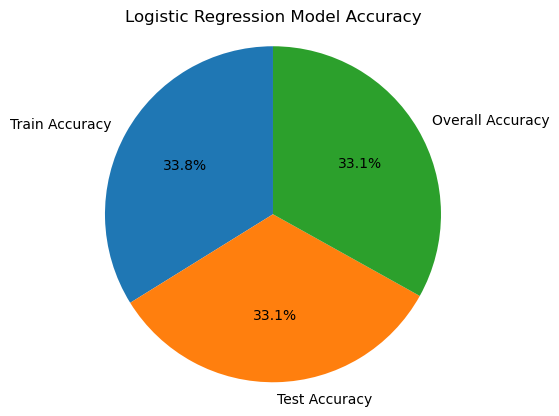

In [19]:
labels = ['Train Accuracy', 'Test Accuracy', 'Overall Accuracy']
accuracy_scores = [train_acc, test_acc, accuracy]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.pie(accuracy_scores, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular
plt.title('Logistic Regression Model Accuracy')
plt.show()

In [20]:
from sklearn.svm import SVC
model = SVC()
model.fit(x_train,y_train)
train_acc = model.score(x_train,y_train)
test_acc = model.score(x_test,y_test)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_pred, y_test)

print(f'Train Accuracy:{train_acc}')
print(f'Test Accuracy:{test_acc}')
print(f'Accuracy:{accuracy}')

Train Accuracy:0.9705882352941176
Test Accuracy:0.9555555555555556
Accuracy:0.9555555555555556


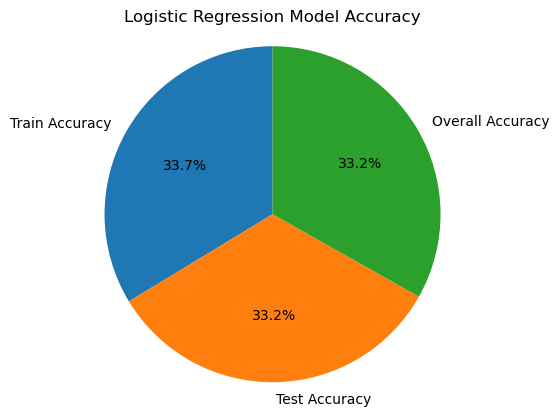

In [21]:
labels = ['Train Accuracy', 'Test Accuracy', 'Overall Accuracy']
accuracy_scores = [train_acc, test_acc, accuracy]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.pie(accuracy_scores, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that the pie is circular
plt.title('Logistic Regression Model Accuracy')
plt.show()

In [22]:
from sklearn.naive_bayes import GaussianNB

# Split the data into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Create a Naive Bayes classifier
model = GaussianNB()

# Train the model
model.fit(x_train, y_train)

# Make predictions on the test set
y_pred = model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"Accuracy: {accuracy}")


Accuracy: 0.9666666666666667


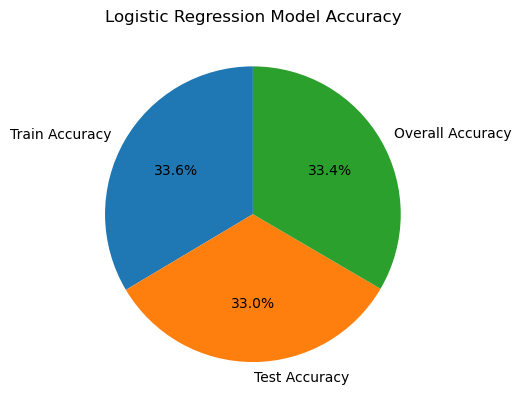

In [23]:
labels = ['Train Accuracy', 'Test Accuracy', 'Overall Accuracy']
accuracy_scores = [train_acc, test_acc, accuracy]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']

plt.pie(accuracy_scores, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('off')  # Equal aspect ratio ensures that the pie is circular
plt.title('Logistic Regression Model Accuracy')
plt.show()

### Visualization 

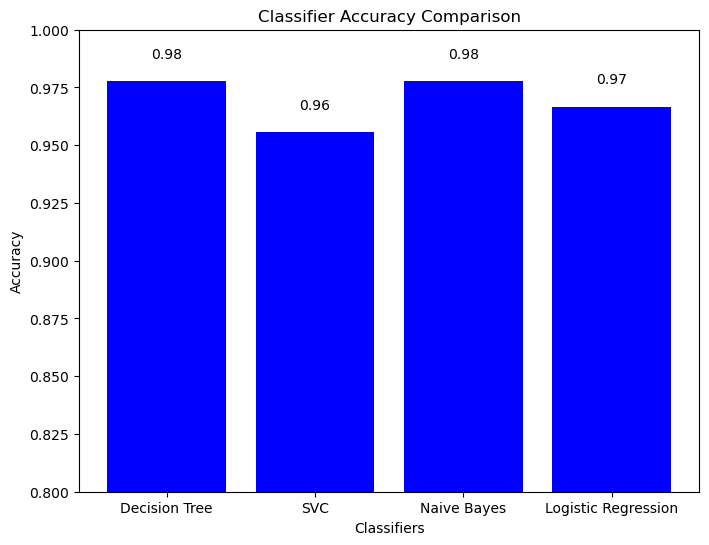

In [24]:
# Accuracy scores of different classifiers
decision_tree_acc = 0.9777777777777777
svc_acc = 0.9555555555555556
naive_bayes_acc = 0.9777777777777777
logistic_regression_acc = 0.9666666666666667

# Classifiers' names
classifiers = ['Decision Tree', 'SVC', 'Naive Bayes', 'Logistic Regression']

# Accuracy values
accuracy_scores = [decision_tree_acc, svc_acc, naive_bayes_acc, logistic_regression_acc]

# Plotting the bar chart
plt.figure(figsize=(8, 6))
plt.bar(classifiers, accuracy_scores, color='blue')
plt.title('Classifier Accuracy Comparison')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy')
plt.ylim([0.8, 1.0])

# Displaying the accuracy values on top of each bar
for i, score in enumerate(accuracy_scores):
    plt.text(i, score + 0.01, f'{score:.2f}', ha='center')

# Showing the plot
plt.show()

In [31]:
new_data = [ [2.1, 3.0, 4.7, 1.0],[5.1, 3.5, 1.4, 0.2],  # example features of a new iris flower
            [6.2, 2.9, 4.3, 1.3]]

new_data_scaled = scaler.transform(new_data)
predictions = model.predict(new_data_scaled)

# Decode the predictions back to original species names
predicted_species = encoder.inverse_transform(predictions)

print("Predicted Species:")
for species in predicted_species:
    print(species)


Predicted Species:
virginica
virginica
virginica


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [26]:
import joblib


In [27]:
joblib.dump(model, 'model_nb.pkl')

['model_nb.pkl']

In [47]:
import joblib

# Load the trained classifier
classifier = joblib.load('model_nb.pkl')

# Use the predict method on the loaded classifier
classifier.predict([[2.1, 3.0, 4.7, 1.0]])

# Print the prediction
print(prediction)

[1]


C:\Users\Hp\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [50]:
predicted_class = encoder.inverse_transform([2])[0]
print(predicted_class)


virginica
